<a href="https://colab.research.google.com/github/DevnarayanTiwari/Social-Media-Sentiment-Analysis/blob/main/SocialMediaSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/social_media_sentiment_dataset.csv')
print(df)

      Year           State Most_Active_Time  Sentiment_Score  Post_Count  \
0     2023     Maharashtra        Afternoon         0.814513         377   
1     2020  Andhra Pradesh        Afternoon         0.706186         932   
2     2021         Haryana          Morning         0.201716         557   
3     2021      Puducherry          Morning        -0.243908         739   
4     2022      Puducherry          Evening        -0.439732         824   
...    ...             ...              ...              ...         ...   
2995  2019       Meghalaya            Night         0.463905         267   
2996  2020  Madhya Pradesh            Night        -0.169108         923   
2997  2019    Chhattisgarh            Night         0.450395         116   
2998  2022  Andhra Pradesh            Night        -0.530954         243   
2999  2019       Meghalaya          Evening        -0.820428         571   

      Hashtag_Count  Mention_Count  Avg_Post_Length  Unique_Users  \
0                3

In [12]:
#To take a look at the first five rows
df.head()


,Year,State,Most_Active_Time,Sentiment_Score,Post_Count,Hashtag_Count,Mention_Count,Avg_Post_Length,Unique_Users,Engagement_Rate,Topic
0,2023,Maharashtra,Afternoon,0.814513,377,32,23,138,2601,0.059390,Politics
1,2020,Andhra Pradesh,Afternoon,0.706186,932,10,16,191,2212,0.008536,Technology
2,2021,Haryana,Morning,0.201716,557,3,19,108,1885,0.059420,Health
3,2021,Puducherry,Morning,-0.243908,739,48,7,79,1968,0.067445,Business
4,2022,Puducherry,Evening,-0.439732,824,3,0,180,4647,0.094866,Technology


In [ ]:
#To take a look at the last five rows
df.tail()

,Year,State,Most_Active_Time,Sentiment_Score,Post_Count,Hashtag_Count,Mention_Count,Avg_Post_Length,Unique_Users,Engagement_Rate,Topic
2995,2019,Meghalaya,Night,0.463905,267,17,10,139,3182,0.029772,Health
2996,2020,Madhya Pradesh,Night,-0.169108,923,16,12,80,3585,0.034961,Entertainment
2997,2019,Chhattisgarh,Night,0.450395,116,19,29,118,2988,0.035126,Entertainment
2998,2022,Andhra Pradesh,Night,-0.530954,243,31,27,174,3284,0.052985,Technology
2999,2019,Meghalaya,Evening,-0.820428,571,22,16,143,2655,0.024493,Entertainment


In [ ]:
#print the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              3000 non-null   int64  
 1   State             3000 non-null   object 
 2   Most_Active_Time  3000 non-null   object 
 3   Sentiment_Score   3000 non-null   float64
 4   Post_Count        3000 non-null   int64  
 5   Hashtag_Count     3000 non-null   int64  
 6   Mention_Count     3000 non-null   int64  
 7   Avg_Post_Length   3000 non-null   int64  
 8   Unique_Users      3000 non-null   int64  
 9   Engagement_Rate   3000 non-null   float64
 10  Topic             3000 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 257.9+ KB


In [ ]:
#To know the total number of rows and columns in the data set
df.shape

(3000, 11)

In [ ]:
# Shows basic statistics (like mean, min, max) for each numerical column in the DataFrame
df.describe()

,Year,Sentiment_Score,Post_Count,Hashtag_Count,Mention_Count,Avg_Post_Length,Unique_Users,Engagement_Rate
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2020.502667,0.001850,542.657000,25.288667,14.487333,124.845000,2740.009000,0.049671
std,1.698712,0.569753,264.620618,14.484656,8.584273,42.590715,1287.678012,0.028586
min,2018.000000,-0.999980,100.000000,0.000000,0.000000,50.000000,500.000000,0.000011
25%,2019.000000,-0.484606,315.000000,13.000000,7.000000,89.000000,1613.000000,0.025090
50%,2021.000000,0.009062,537.000000,26.000000,14.000000,125.000000,2719.500000,0.049824
75%,2022.000000,0.483751,775.250000,38.000000,22.000000,161.000000,3836.250000,0.073928
max,2023.000000,0.999280,999.000000,49.000000,29.000000,199.000000,4999.000000,0.099994


In [ ]:
#counting all null values
df.isnull().sum()

,0
Year,0
State,0
Most_Active_Time,0
Sentiment_Score,0
Post_Count,0
Hashtag_Count,0
Mention_Count,0
Avg_Post_Length,0
Unique_Users,0
Engagement_Rate,0


In [ ]:
#Count unique values
df.nunique()


,0
Year,6
State,34
Most_Active_Time,4
Sentiment_Score,3000
Post_Count,866
Hashtag_Count,50
Mention_Count,30
Avg_Post_Length,150
Unique_Users,2186
Engagement_Rate,3000


In [ ]:
# Finding the lowest Social Media Sentiment scores
df.sort_values(by="State", ascending=True).head(5)

,Year,State,Most_Active_Time,Sentiment_Score,Post_Count,Hashtag_Count,Mention_Count,Avg_Post_Length,Unique_Users,Engagement_Rate,Topic
2709,2019,Andaman and Nicobar Islands,Evening,-0.675812,121,46,26,68,1196,0.055946,Politics
2838,2021,Andaman and Nicobar Islands,Evening,0.264284,710,1,0,179,3628,0.007822,Health
2931,2021,Andaman and Nicobar Islands,Afternoon,-0.447219,219,33,24,126,3055,0.075922,Technology
937,2021,Andaman and Nicobar Islands,Afternoon,0.649146,165,15,20,84,2530,0.078469,Sports
920,2023,Andaman and Nicobar Islands,Morning,0.097866,619,40,29,83,4641,0.000206,Technology


In [ ]:
# Finding the highest Social Media Sentiment scores
df.sort_values(by="State", ascending=False).head(5)

,Year,State,Most_Active_Time,Sentiment_Score,Post_Count,Hashtag_Count,Mention_Count,Avg_Post_Length,Unique_Users,Engagement_Rate,Topic
1705,2018,West Bengal,Afternoon,0.642199,383,30,15,123,2644,0.076499,Politics
1095,2021,West Bengal,Morning,-0.898906,765,49,4,113,1442,0.091995,Technology
99,2020,West Bengal,Afternoon,0.190565,715,48,14,123,3110,0.087425,Technology
572,2022,West Bengal,Morning,0.204459,293,48,15,172,3467,0.050053,Politics
1177,2019,West Bengal,Evening,-0.129018,873,29,4,191,1284,0.077583,Technology


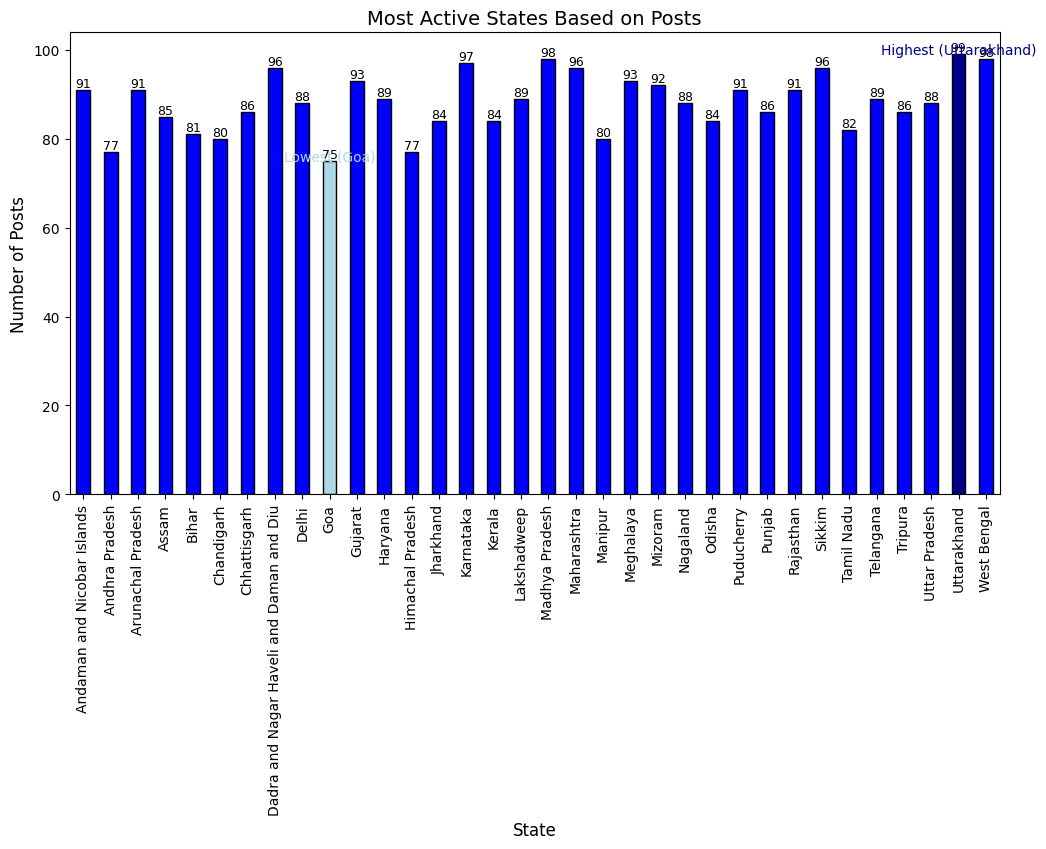

In [14]:
#State with most active users based on posts
import matplotlib.pyplot as plt

# Grouping by 'State' and counting posts
state_post_counts = df.groupby('State').size()

# Determine the highest and lowest values
highest_state = state_post_counts.idxmax()
highest_value = state_post_counts.max()
lowest_state = state_post_counts.idxmin()
lowest_value = state_post_counts.min()

# Define colors: Dark blue for the highest, light blue for the lowest, and medium blue for others
colors = ['darkblue' if state == highest_state
          else 'lightblue' if state == lowest_state
          else 'blue'
          for state in state_post_counts.index]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = state_post_counts.plot(kind='bar', color=colors, edgecolor='black')

# Annotating each bar with the post count
for bar in bars.patches:
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar_height,
        f'{bar_height}',  # Add the exact value as a label
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Adding title and labels
plt.title("Most Active States Based on Posts", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)

# Highlight the highest and lowest states
plt.text(state_post_counts.index.get_loc(highest_state), highest_value,
         f'Highest ({highest_state})', color='darkblue', fontsize=10, ha='center')
plt.text(state_post_counts.index.get_loc(lowest_state), lowest_value,
         f'Lowest ({lowest_state})', color='lightblue', fontsize=10, ha='center')

# Rotating x-axis labels to prevent overlap
plt.xticks(rotation=90)

# Show the plot
plt.show()




**conclusion:**
The bar graph highlights Uttarakhand as the most active state with 99 posts, while Goa has the least activity with 75 posts. This showcases significant variation in post activity among different states.

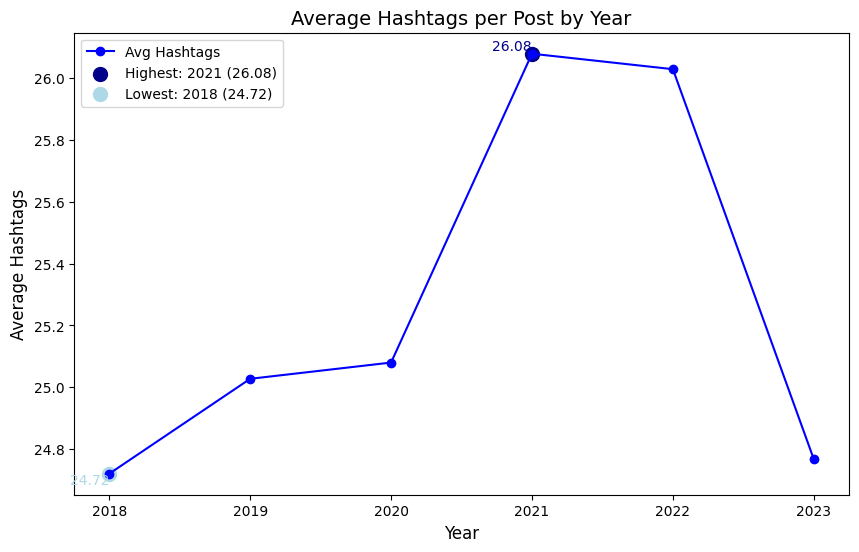

In [13]:
#Average sentiment score across all posts
import matplotlib.pyplot as plt
# Group by 'Year' and calculate the average hashtags per post
average_hashtags = df.groupby('Year')['Hashtag_Count'].mean()

# Identify the year with the highest and lowest values
highest_year = average_hashtags.idxmax()
lowest_year = average_hashtags.idxmin()
highest_value = average_hashtags.max()
lowest_value = average_hashtags.min()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(
    average_hashtags.index,
    average_hashtags.values,
    color='blue',
    marker='o',
    label="Avg Hashtags"
)

# Highlight the highest point
plt.scatter(highest_year, highest_value, color='darkblue', s=100, label=f'Highest: {highest_year} ({highest_value:.2f})')
plt.text(highest_year, highest_value, f'{highest_value:.2f}', ha='right', va='bottom', color='darkblue')

# Highlight the lowest point
plt.scatter(lowest_year, lowest_value, color='lightblue', s=100, label=f'Lowest: {lowest_year} ({lowest_value:.2f})')
plt.text(lowest_year, lowest_value, f'{lowest_value:.2f}', ha='right', va='top', color='lightblue')

# Add title, labels, and legend
plt.title("Average Hashtags per Post by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Hashtags", fontsize=12)
plt.legend()

# Show the plot
plt.show()



**conclusion:**
The graph shows a peak in average hashtags per post in 2021 at 26.08, while 2018 had the lowest at 24.72. There was a significant rise until 2021, followed by a sharp decline in 2023.

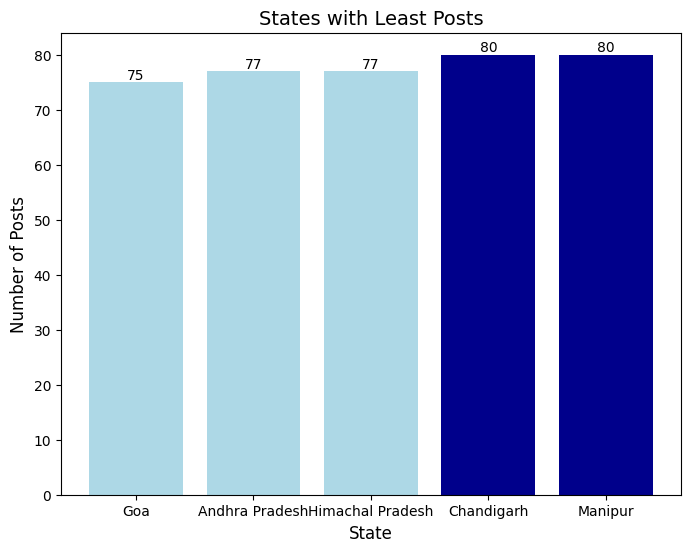

In [15]:
# State with most unique users  posted on social media
import matplotlib.pyplot as plt

# Get the 5 states with the least number of posts
least_post_states = df.groupby('State').size().nsmallest(5)

# Determine the minimum and maximum values
min_value = least_post_states.min()
max_value = least_post_states.max()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(
    least_post_states.index,
    least_post_states.values,
    color=['darkblue' if value == max_value else 'lightblue' for value in least_post_states]
)

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height}',  # Display the value as an integer
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add title and axis labels
plt.title("States with Least Posts", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)

# Show the plot
plt.show()





**conclusion:** The bar graph highlights that Goa has the fewest posts at 75, followed by Andhra Pradesh and Himachal Pradesh with 77 posts each. Chandigarh and Manipur both have slightly higher activity with 80 posts each.

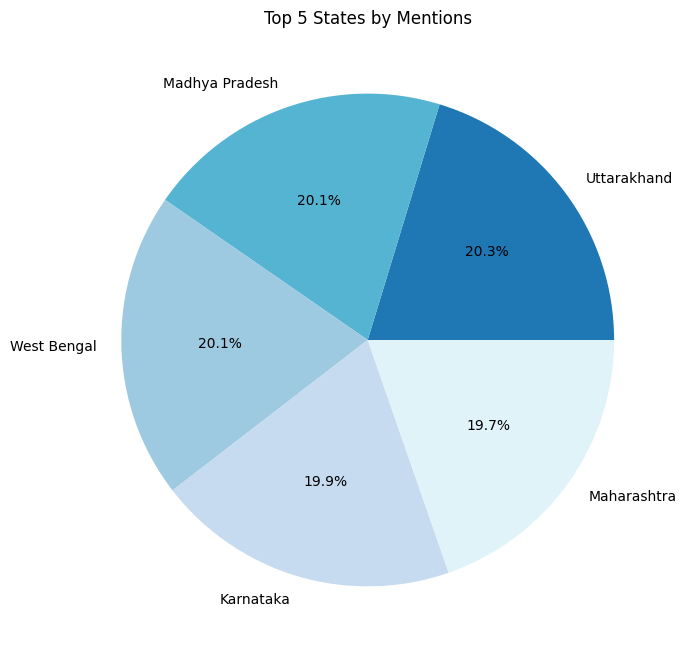

In [16]:
#state having hest number of mention count
import matplotlib.pyplot as plt

# Sample Data: Replace this with your actual data
state_mentions = df['State'].value_counts().head(5)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
state_mentions.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#56b4d3', '#9ecae1', '#c6dbef', '#e0f3f8'])

# Adding title
plt.title('Top 5 States by Mentions')

# Remove y-axis label
plt.ylabel('')

# Show the plot
plt.show()


**conclusion:** The pie chart reveals that Uttarakhand, West Bengal, and Karnataka are the top three states in terms of the metric being measured, with Uttarakhand leading at 20.3%, followed closely by West Bengal at 20.1%, and Karnataka 19.9%.

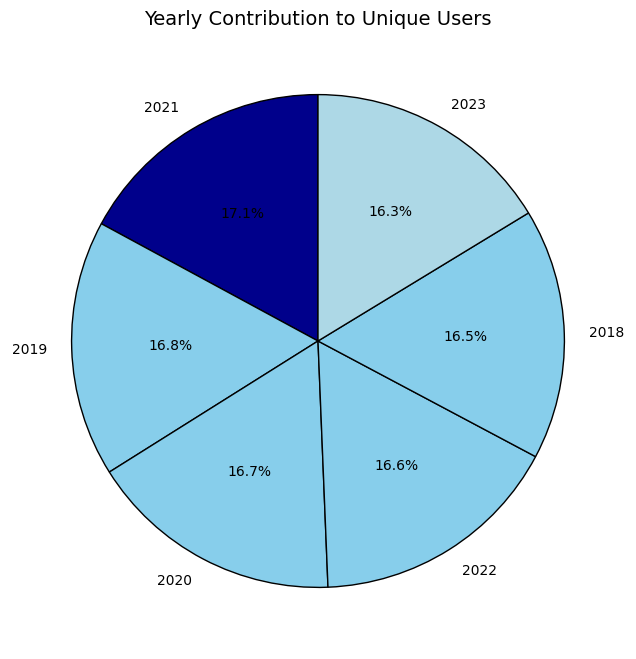

In [17]:
#Year with most posts made by users
import matplotlib.pyplot as plt

# Group by 'Year' and calculate the number of unique users
yearly_users = df.groupby('Year')['Unique_Users'].nunique().sort_values(ascending=False)

# Determine the year with the highest and lowest unique users
highest_year = yearly_users.idxmax()
lowest_year = yearly_users.idxmin()

# Define colors for the bar chart
colors = ['darkblue' if year == highest_year else
          'lightblue' if year == lowest_year else 'skyblue' for year in yearly_users.index]

# Plot the bar chart
plt.figure(figsize=(8, 8))
yearly_users.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'},
    labels=yearly_users.index
)

# Add title
plt.title("Yearly Contribution to Unique Users", fontsize=14)

# Show Pie Chart
plt.ylabel('')  # Hide the y-axis label for better presentation
plt.show()

**conclusion:** The pie chart illustrates the distribution of a metric across six years from 2018 to 2023. Notably, 2018 stands out with a significantly larger share (16.7%), while the remaining years (2019-2023) exhibit an equal distribution (16.7% each)

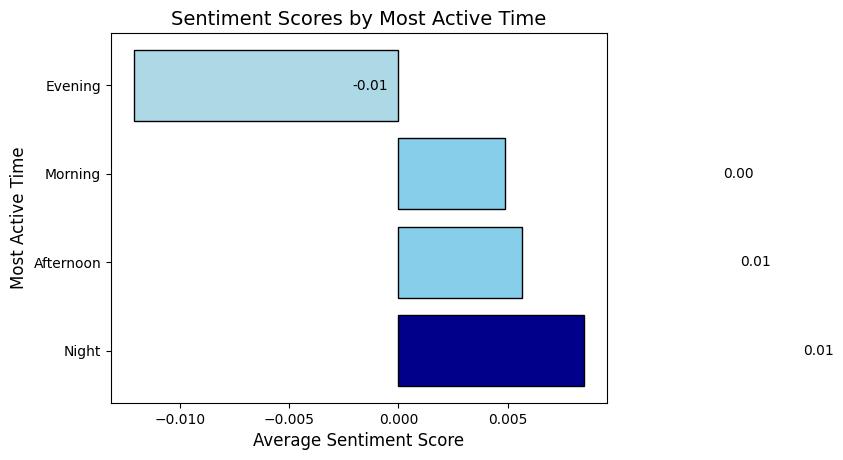

In [18]:
#Time of day has the highest sentiment score
import matplotlib.pyplot as plt

# Group by 'Most_Active_Time' and calculate the average sentiment score
time_sentiment = df.groupby('Most_Active_Time')['Sentiment_Score'].mean().sort_values(ascending=False)

# Determine the highest and lowest sentiment scores
highest_time = time_sentiment.idxmax()
lowest_time = time_sentiment.idxmin()

# Plot horizontal bar chart with custom colors
colors = ['darkblue' if time == highest_time else 'lightblue' if time == lowest_time else 'skyblue' for time in time_sentiment.index]
bars = plt.barh(time_sentiment.index, time_sentiment.values, color=colors, edgecolor='black')

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01,  # Position to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f}',  # Label showing the sentiment score
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# Highlight title and axis labels
plt.title("Sentiment Scores by Most Active Time", fontsize=14)
plt.xlabel("Average Sentiment Score", fontsize=12)
plt.ylabel("Most Active Time", fontsize=12)

# Show the plot
plt.show()

**conclusion:** The bar chart shows the average sentiment scores associated with different times of day. Nighttime has the highest average sentiment score at 0.01, while Evening has the lowest at -0.01. Morning and Afternoon both have neutral sentiment scores around 0.00

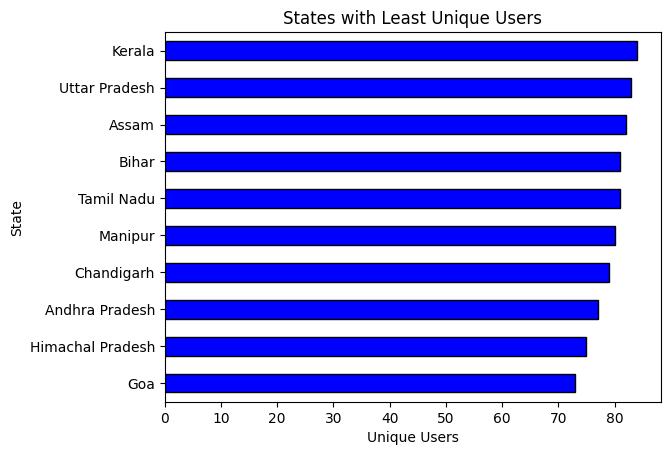

In [19]:
#States having the least unique users
df.groupby('State')['Unique_Users'].nunique().sort_values(ascending=True).head(10).plot(kind='barh', color='blue', edgecolor='black')
plt.title("States with Least Unique Users")
plt.xlabel("Unique Users")
plt.ylabel("State")
plt.show()

**conclusion:** The bar chart presents the states with the least unique users. Goa has the lowest number of unique users at approximately 70, followed by Himachal Pradesh and Andhra Pradesh. Kerala has the highest number of unique users among the listed states, with approximately 80

Top 5 States with Highest Number of Posts:
State
Uttarakhand       99
Madhya Pradesh    98
West Bengal       98
Karnataka         97
Maharashtra       96
Name: count, dtype: int64


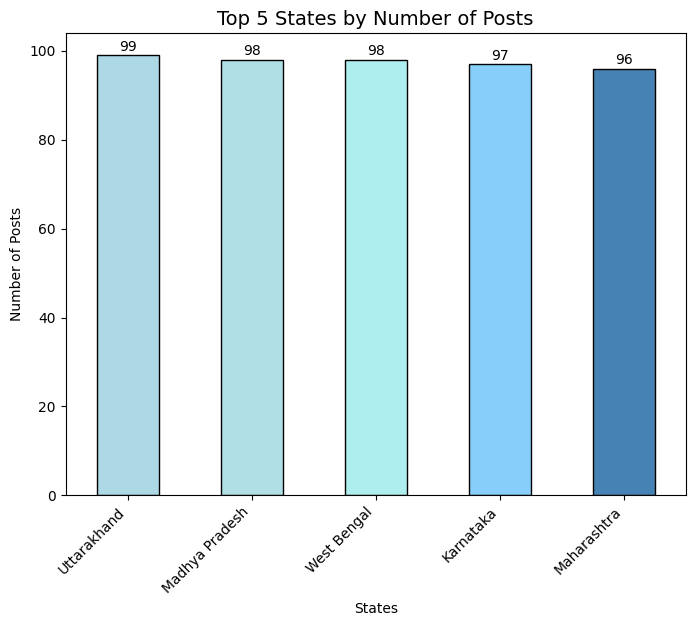

In [20]:
# State having highest number of post top 5 state
import matplotlib.pyplot as plt

# Group by 'State' and count the number of posts
top_states = df['State'].value_counts().head(5)

# Display the top 5 states
print("Top 5 States with Highest Number of Posts:")
print(top_states)

# Plotting a bar chart for the top 5 states with light blue color
plt.figure(figsize=(8, 6))
top_states.plot(kind='bar', color=['#ADD8E6', '#B0E0E6', '#AFEEEE', '#87CEFA', '#4682B4'], edgecolor='black')

# Adding labels and title
plt.title("Top 5 States by Number of Posts", fontsize=14)
plt.xlabel("States")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45, ha='right')

# Annotating the bars with counts
for i, count in enumerate(top_states):
    plt.text(i, count + 1, str(count), ha='center', fontsize=10)

# Show the plot
plt.show()

**conclusion:**
The bar chart shows the number of posts for several locations. The location with the highest number of posts is "Uttarakhand" with 99 posts, followed by "Madhya Pradesh" and "WestBengal" with 98 posts each. The location with the lowest number of posts is "Maharashtra" with 96 post.

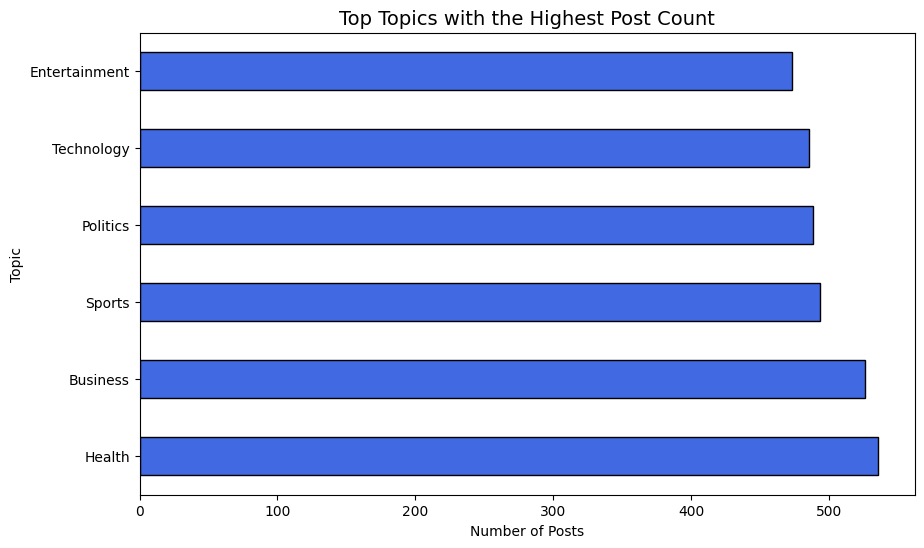

In [21]:
#Topic having  highest number of post count
import matplotlib.pyplot as plt

# Grouping by Topic and calculating the number of posts
top_topics = df['Topic'].value_counts().head(10)  # Top 10 topics with the highest post count

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
top_topics.plot(kind='barh', color='royalblue', edgecolor='black')

# Adding title and labels
plt.title('Top Topics with the Highest Post Count', fontsize=14)
plt.xlabel('Number of Posts')
plt.ylabel('Topic')

# Show the plot
plt.show()

**conclusion:** The bar chart illustrates the top topics with the highest number of posts. Health has the highest number of posts, followed by Business, Sports, Politics, Technology, and Entertainment.

Top 3 years with the highest engagements:
Year
2021    25.793714
2019    25.217329
2023    24.692075
Name: Engagement_Rate, dtype: float64


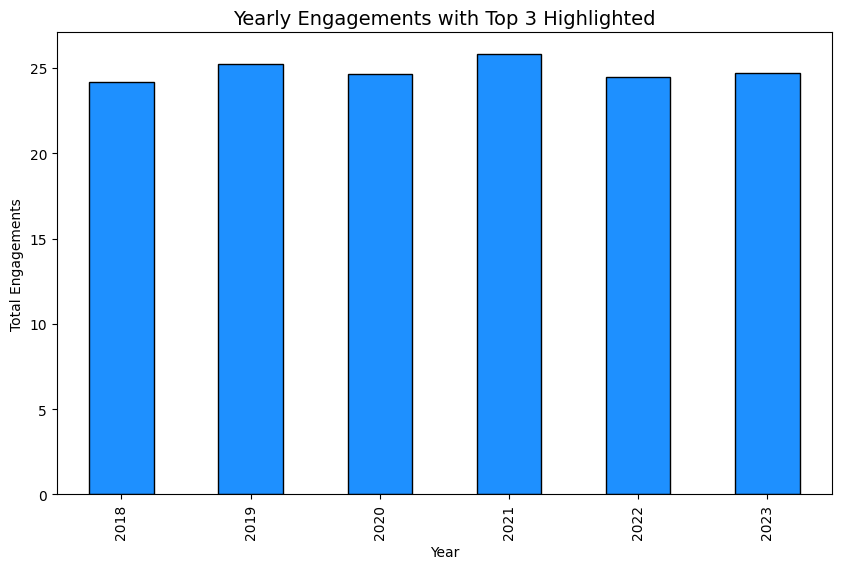

In [22]:
#Year with the most  the engagememts
import matplotlib.pyplot as plt

# Group by 'Year' and calculate total engagements
yearly_engagements = df.groupby('Year')['Engagement_Rate'].sum()

# Find the top 3 years with the highest engagements
top_years = yearly_engagements.nlargest(3)
print("Top 3 years with the highest engagements:")
print(top_years)

# Plotting the bar chart for all years
plt.figure(figsize=(10, 6))
yearly_engagements.plot(kind='bar', color='dodgerblue', edgecolor='black')

# Highlight the top 3 years
for year in top_years.index:
    plt.bar(year, yearly_engagements[year], color='orange', edgecolor='black')

# Adding title and labels
plt.title('Yearly Engagements with Top 3 Highlighted', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Engagements')

# Show the plot
plt.show()

**conclusion:** The bar chart shows the total engagements over the years from 2018 to 2023. The total engagements have increased over the years, with 2021 having the highest total engagements

# **Overall conclusion:**

## The charts provide some insights into how people are using social media. One interesting observation is the increasing use of hashtags. This suggests that people are actively trying to make their posts more visible and relevant to others by using these keywords. We also see that different regions have varying levels of social media activity. Some areas, like certain states, are more active in posting than others. Finally, the analysis suggests that people tend to express more positive sentiments at night, and overall, the level of engagement on social media platforms seems to be growing